# Pipeline imagenes de Difusión

In [34]:
import warnings
warnings.filterwarnings('ignore')
from niwidgets import NiftiWidget
import os
from time import time
%env FSLDIR=/usr/local/fsl/

env: FSLDIR=/usr/local/fsl/


## Visualización Imagen estructural T1

El valor de path debe ser la dirección de la imagen estructural T1

In [15]:
path_t1="/home/runlab/scripts/cristian/test/T1.nii.gz"
NiftiWidget(path_t1).nifti_plotter(colormap='gray')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=127, continuous_update=False, description='x', max=255), IntSlider(value…

## Visualización Imagen de Difusión

El valor de path debe ser la dirección de la imagen DWI

In [16]:
path_dwi="/home/runlab/scripts/cristian/test/TENSOR.nii.gz"
NiftiWidget(path_dwi).nifti_plotter(colormap='gray')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=127, continuous_update=False, description='x', max=255), IntSlider(value…

## eddy_correction

### Corrección de corrientes de eddy generadas en la adquisición de las imágenes debido al campo magnetico del resonador

In [28]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/eddy_correction.py "/home/runlab/scripts/cristian/test/TENSOR.nii.gz" "/home/runlab/scripts/cristian/test"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running Eddy Correction...
/home/runlab/scripts/cristian/test/TENSOR_EddyCorrect.nii.gz
Elapsed time: 0.2735996246 seconds.


In [29]:
from tareas.dependencias.fsl_wrapper import eddy_correct

In [33]:
file_in="/home/runlab/scripts/cristian/test/temp_eddy/TENSOR.nii.gz"
file_out="/home/runlab/scripts/cristian/test/eddy.nii.gz"
referenceNo='0'

In [35]:
command = 'eddy_correct ' + file_in + ' ' + file_out + ' ' + referenceNo
os.system(command)

32512

In [36]:
command

'eddy_correct /home/runlab/scripts/cristian/test/temp_eddy/TENSOR.nii.gz /home/runlab/scripts/cristian/test/eddy.nii.gz 0'

## Non Local Mean

### Proceso que permite quitar el ruido de la imagen

In [18]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/nonLocalMean.py "/home/runlab/scripts/cristian/test/TENSOR.nii.gz" "/home/runlab/scripts/cristian/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running NonLocal Mean algoritm...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
/home/runlab/scripts/cristian/test/TENSOR_NonLocalMean.nii.gz
Elapsed time: 578.9906759262 seconds.


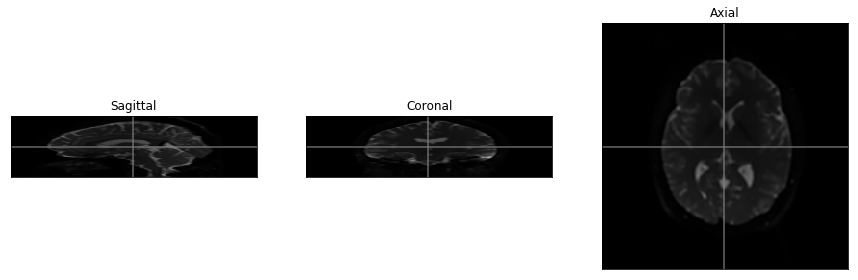

In [6]:
out="/home/cpulido/all/DWI/test/TENSOR_NonLocalMean.nii.gz"
NiftiWidget(out).nifti_plotter(colormap='gray')

## Reslicing
###  Redimensiona los voxeles de la imagenen de tal forma que queda isotropico

In [7]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/reslicing.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - runnning Reslice...
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz
Elapsed time: 86.8495440483 seconds.


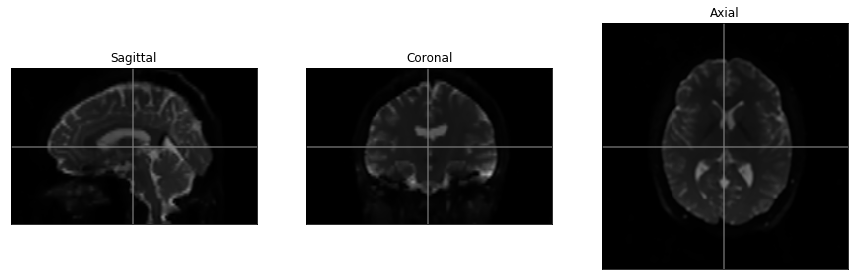

In [8]:
out="/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz"
NiftiWidget(out).nifti_plotter(colormap='gray')

## Bet DWI
### Extrae el cerebro de la imagen

In [9]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/betDWI.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running BET with FSL...
Ejecutando
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 30.1716310978 seconds.


## to_register_dwi_to_mni
## 



In [10]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_register_dwi_to_mni.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
NO Data time
terminado affine registartion
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
terminado syn registartion
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_normalized.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 1085.5715253353 seconds.


## To estimate dti

In [11]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_estimate_dti.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - building DTI Model...
Unexpected error: <class 'FileNotFoundError'>
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvecs.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvals.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 81.2918457985 seconds.


## To_estimate_dti_maps

In [12]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_estimate_dti_maps.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    -     - computing of FA map
    -     - computing of Color FA map
    -     - computing of MD map
    -     - computing of AD map
    -     - computing of RD map
['/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_FA.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_MD.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_AD.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_RD.nii.gz']
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 50.8595564365 seconds.


## to generate bunddle

In [3]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_generate_bunddle.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - starting of model
    - ending of model
    - starting of classifier
    - ending of classifier
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Finished exclusive filtering:
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/cpulido/all/DWI/test/AAN_ROI_3.0.nii.gz
Morel
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_4.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_5.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_6.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_18.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_42.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_43.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_44.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_56.0.nii.gz
HypothalamusAtlas
/home/cpulido/all/DWI/test/Hypothalamus_ROI_1.0.nii.gz
/home/cpulido/all/DWI/test/Hypothalamus_ROI_2.0.nii.gz
/home/cpulido/all/DWI/test/Hypothalamus_ROI_3.0.nii.gz
/home/cpulido/all/DWI/test/feature.out
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 712.6888489723 seconds.


## to genereate tractography

In [4]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_generate_tractography.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - Starting reconstruction of Tractography...
    - Ending reconstruction of Tractography...
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 669.5343232155 seconds.
